# Major Project - 1 (Cognitive Application)

GROUP MEMBERS : ABHIJITH UDAYAKUMAR, MANSI SHARMA, VASUNDHARA RAJ

## IRIS FLOWER CLASSIFICATION

This is one of the most famous machine learning projects with Iris Flowers being the simplest
machine learning datasets in classification literature. The dataset has numeric attributes and
ML beginners need to figure out how to load and handle data. The iris dataset is small which
easily fits into the memory and does not require any special transformations or scaling, to
begin with.

```The goal of this machine learning project is to classify the flowers into among the three species – 
virginica, setosa, or versicolor based on length and width of petals and sepals.```

[Dataset](https://drive.google.com/file/d/1lmkJ6DKK6dONYTQNuJc1sEsCaVtgpOn_/view)

[Reference](https://medium.com/gft-engineering/start-to-learn-machine-learning-with-the-iris-flower-classification-challenge-4859a920e5e3)

<br><br>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import keras #library for neural network
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [2]:
df = pd.read_csv("data/iris.csv")

In [3]:
df.head() # head displays the first 5 data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


In [5]:
df.shape # (rows, columns)

(150, 6)

In [6]:
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# setosa, virginica, versicolor
df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

C:\Users\ABHIJITH UDAYAKUMAR\.conda\envs\tensorflow-gpu-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ABHIJITH UDAYAKUMAR\.conda\envs\tensorflow-gpu-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ABHIJITH UDAYAKUMAR\.conda\envs\tensorflow-gpu-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

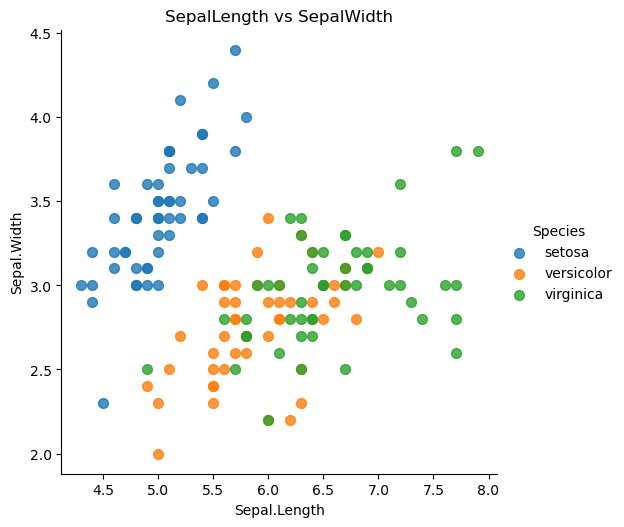

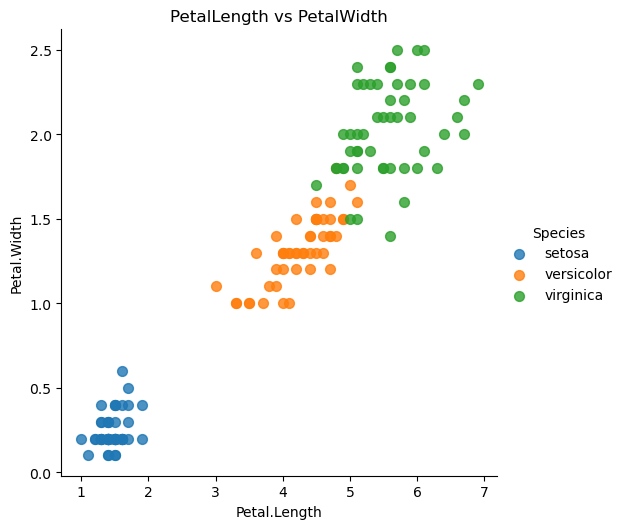

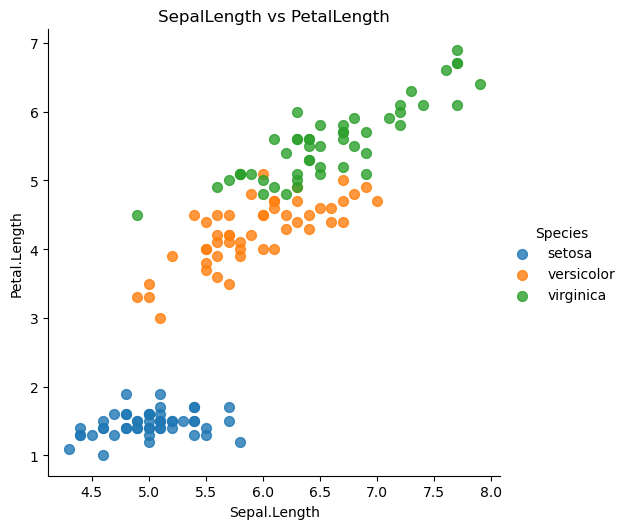

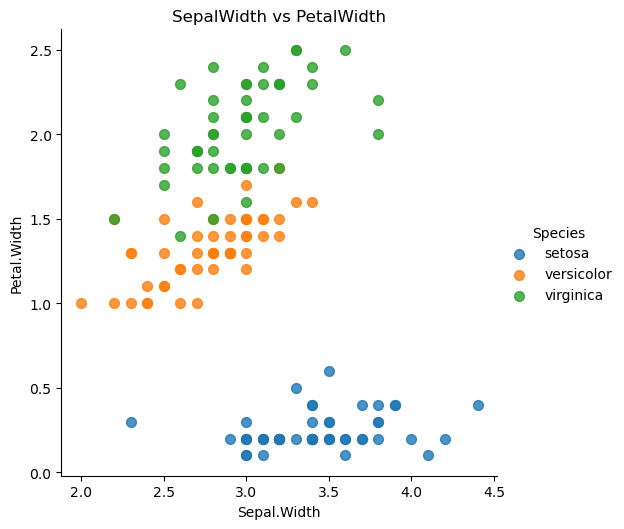

In [8]:
sns.lmplot('Sepal.Length', 'Sepal.Width',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('Petal.Length', 'Petal.Width',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('Sepal.Length', 'Petal.Length',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('Sepal.Width', 'Petal.Width',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [9]:
# Input and Output

In [10]:
array = df.values
array

array([[1, 5.1, 3.5, 1.4, 0.2, 'setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'setosa'],
       [22, 5.1, 3.7, 1.5, 0.4, 'setosa'],
       [23, 4.6, 3.6, 1.0, 0.2, 'setosa'],
       [24, 5.1, 3.3

In [11]:
X = array[:, 1:5]  # input
y = array[:, 5]  # output

In [12]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 20%

In [13]:
X_train.shape  # training input

(120, 4)

In [14]:
X_test.shape  # testing input

(30, 4)

Working with:
- KNN
- Logistic Regression
- Discriminant Analysis
- Naive Bayes
- SVM
- Neural Networks

In [15]:
#BUILDING
models = []
#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#Linear Discriminant Analysis
models.append(('LDA', LinearDiscriminantAnalysis()))
#K-Nearest neighbors
models.append(('KNN', KNeighborsClassifier()))
#Gaussian Naive Bayes
models.append(('NB', GaussianNB()))
#Support Vector Machines
models.append(('SVM', SVC(gamma='auto')))

In [16]:
#Evaluate
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print('%s: %f' % (name, acc))

LR: 0.833333
LDA: 1.000000
KNN: 1.000000
NB: 0.966667
SVM: 0.966667


Found 100% accuracy in LDA and KNN

### KNN

In [17]:
model_knn = KNeighborsClassifier()

In [18]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
predictions_knn = model_knn.predict(X_test)

In [20]:
predictions_knn

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [21]:
y_test

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [22]:
accuracy_score(y_test, predictions_knn)

1.0

In [23]:
pred = model_knn.predict([[5, 2, 3.9, 6.2]])
pred

array(['virginica'], dtype=object)

<br>

### LDA

In [24]:
model_lda = LinearDiscriminantAnalysis()

In [25]:
model_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [26]:
predictions_lda = model_lda.predict(X_test)

In [27]:
predictions_lda

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [28]:
y_test

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [29]:
accuracy_score(y_test, predictions_lda) 

1.0

In [30]:
pred = model_lda.predict([[5, 2, 3.9, 6.2]])
pred

array(['virginica'], dtype='<U10')

<br>

### Neural Network

In [31]:
df.loc[df["Species"]=="setosa","Species"]=0
df.loc[df["Species"]=="versicolor","Species"]=1
df.loc[df["Species"]=="virginica","Species"]=2
print(df.head())
print(df.tail())

   Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2       0
1           2           4.9          3.0           1.4          0.2       0
2           3           4.7          3.2           1.3          0.2       0
3           4           4.6          3.1           1.5          0.2       0
4           5           5.0          3.6           1.4          0.2       0
     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
145         146           6.7          3.0           5.2          2.3       2
146         147           6.3          2.5           5.0          1.9       2
147         148           6.5          3.0           5.2          2.0       2
148         149           6.2          3.4           5.4          2.3       2
149         150           5.9          3.0           5.1          1.8       2


In [32]:
df=df.iloc[np.random.permutation(len(df))]
print(df.head())

     Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
25           26           5.0          3.0           1.6          0.2       0
84           85           5.4          3.0           4.5          1.5       1
70           71           5.9          3.2           4.8          1.8       1
47           48           4.6          3.2           1.4          0.2       0
137         138           6.4          3.1           5.5          1.8       2


Converting data to numpy array in order for processing

In [33]:
X=df.iloc[:,1:5].values
y=df.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[5.  3.  1.6 0.2]
 [5.4 3.  4.5 1.5]
 [5.9 3.2 4.8 1.8]]
Examples of y
 [0 1 1]


In order to maintain a good accuracy, the feature of each dataset must be normalized to a range of 0-1 for processing

In [34]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.06917906 0.07932179 0.03148344 0.01150242]
 [0.07471338 0.07932179 0.08854717 0.08626818]
 [0.08163129 0.08460991 0.09445032 0.10352182]]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

In [36]:
X_train.shape

(120, 4)

In [37]:
X_test.shape

(30, 4)

In [38]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''

y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [39]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              5000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=6,verbose=1)

Epoch 1/6
6/6 [==============================] - 0s 28ms/step - loss: 1.0782 - accuracy: 0.4000 - val_loss: 1.0614 - val_accuracy: 0.2667
Epoch 2/6
6/6 [==============================] - 0s 6ms/step - loss: 0.9934 - accuracy: 0.6250 - val_loss: 0.9551 - val_accuracy: 0.5667
Epoch 3/6
6/6 [==============================] - 0s 7ms/step - loss: 0.8412 - accuracy: 0.6917 - val_loss: 0.7887 - val_accuracy: 0.5667
Epoch 4/6
6/6 [==============================] - 0s 7ms/step - loss: 0.6372 - accuracy: 0.6917 - val_loss: 0.5811 - val_accuracy: 0.5667
Epoch 5/6
6/6 [==============================] - 0s 7ms/step - loss: 0.4570 - accuracy: 0.7917 - val_loss: 0.3633 - val_accuracy: 0.9667
Epoch 6/6
6/6 [==============================] - 0s 7ms/step - loss: 0.3448 - accuracy: 0.8917 - val_loss: 0.2479 - val_accuracy: 1.0000


In [42]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 100.0


An accuracy of 100% is achieved in this dataset.It can be asserted that for each epoch, the neural network is trying to learn from its existing feature and predict it by its weights and biases. For each epoch, the weights and biases and changed by subtracting its rate to get a better accuracy each time.